In [26]:
#07-17 Random Forest
import pandas as pd

In [98]:
df = pd.read_excel("lc_inv_geoLights.xlsx")
df.head()

,index,WoID,WoEntered,WoCompleted,gpsX_light,gpsY_light,inventoryID,altinventoryIDchar,SLpepcolightID,SLlighttype,...,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,gpsX_crime,gpsX_crime.1,Tdelta,light_clusters
0,0,1067343,2011-09-29 20:56:52,2016-11-21 07:09:52,-76.988519,38.856961,4.0,-???-,??,High Pressure Sodium,...,38.856883,-76.988237,NaN,2014-06-29T12:15:00.000Z,2014-06-29T20:05:00.000Z,166732712,-76.988239,38.856890,0,5
29,1,1076333,2012-01-19 23:10:12,2016-11-21 07:09:36,-76.993025,38.889819,4.0,-???-,??,High Pressure Sodium,...,38.889800,-76.993211,NaN,2012-08-27T09:00:00.000Z,2012-08-27T18:30:00.000Z,166232512,-76.993213,38.889807,0,1
42,2,1085417,2012-05-20 01:25:40,2016-11-21 07:09:15,-76.942939,38.885127,4.0,-???-,??,High Pressure Sodium,...,38.884885,-76.943040,NaN,2013-05-17T22:29:00.000Z,2013-05-17T22:29:00.000Z,165887271,-76.943042,38.884893,0,2
57,3,1090068,2012-07-16 08:56:06,2016-11-21 07:09:06,-76.939169,38.901913,4.0,-???-,??,High Pressure Sodium,...,38.901491,-76.939185,NaN,2013-08-01T00:42:00.000Z,2013-08-01T00:42:00.000Z,166141803,-76.939187,38.901498,0,2
64,5,1113893,2013-07-05 11:11:36,2016-06-09 09:38:00,-77.072398,38.926423,4.0,-???-,??,High Pressure Sodium,...,38.926180,-77.072608,NaN,2015-03-27T23:45:00.000Z,2015-03-28T21:00:00.000Z,166631663,-77.072610,38.926188,0,3


In [127]:
df.columns

Index(['index', 'WoID', 'WoEntered', 'WoCompleted', 'gpsX_light', 'gpsY_light',
       'inventoryID', 'altinventoryIDchar', 'SLpepcolightID', 'SLlighttype',
       'SLwattage', 'SLpoletype', 'SLpoleheight', 'SLpolestyle', 'SLpowerfeed',
       'SLnumberarms', 'SLarmlength', 'SLrdtype', 'SLfixture', 'geometry',
       'index_right', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE',
       'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'gpsX_crime', 'gpsX_crime.1', 'Tdelta',
       'light_clusters'],
      dtype='object')

In [128]:
#Create subset of df called sub_df
cols = ['light_clusters','SLnumberarms','WARD','METHOD','OFFENSE','SHIFT','Tdelta',]
sub_df = df[cols]
sub_df.head()

,light_clusters,SLnumberarms,WARD,METHOD,OFFENSE,SHIFT,Tdelta
0,5,?,8.0,OTHERS,THEFT F/AUTO,EVENING,0
29,1,?,6.0,OTHERS,THEFT/OTHER,EVENING,0
42,2,?,7.0,OTHERS,BURGLARY,EVENING,0
57,2,?,7.0,GUN,ROBBERY,MIDNIGHT,0
64,3,?,3.0,OTHERS,THEFT F/AUTO,EVENING,0


In [130]:
#Change inputs in sub_df from string values to integers
sub_df = sub_df.replace({"0":0, "1":1, "2":2 })
sub_df["SLnumberarms"].value_counts()

1    116951
0     24669
?     10867
2       787
Name: SLnumberarms, dtype: int64

In [131]:
#Find the mode for SLnumberarms
sub_df["SLnumberarms"].mode()

0    1
dtype: object

In [132]:
#Impute values
sub_df = sub_df.replace({'?':1})
sub_df = sub_df.fillna(1)

In [133]:
#Check for null values in sub_df
sub_df.isnull().sum()

light_clusters    0
SLnumberarms      0
WARD              0
METHOD            0
OFFENSE           0
SHIFT             0
Tdelta            0
dtype: int64

In [134]:
#Create dummy variables
dummies = pd.get_dummies(sub_df.iloc[:,-4:-1])

In [135]:
#Include dummies in df_final
df_final = pd.concat([sub_df[["light_clusters","SLnumberarms","WARD","Tdelta"]], dummies], axis=1)
df_final.head()

,light_clusters,SLnumberarms,WARD,Tdelta,METHOD_GUN,METHOD_KNIFE,METHOD_OTHERS,OFFENSE_ARSON,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_BURGLARY,OFFENSE_HOMICIDE,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_ROBBERY,OFFENSE_SEX ABUSE,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,SHIFT_EVENING,SHIFT_MIDNIGHT
0,5,1.0,8.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
29,1,1.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
42,2,1.0,7.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
57,2,1.0,7.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
64,3,1.0,3.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [136]:
cols = df_final.columns.tolist()
cols

['light_clusters',
 'SLnumberarms',
 'WARD',
 'Tdelta',
 'METHOD_GUN',
 'METHOD_KNIFE',
 'METHOD_OTHERS',
 'OFFENSE_ARSON',
 'OFFENSE_ASSAULT W/DANGEROUS WEAPON',
 'OFFENSE_BURGLARY',
 'OFFENSE_HOMICIDE',
 'OFFENSE_MOTOR VEHICLE THEFT',
 'OFFENSE_ROBBERY',
 'OFFENSE_SEX ABUSE',
 'OFFENSE_THEFT F/AUTO',
 'OFFENSE_THEFT/OTHER',
 'SHIFT_EVENING',
 'SHIFT_MIDNIGHT']

In [137]:
#Rearrange columns
new_cols = cols[:3] + cols[4:] + [cols[3]]

In [138]:
new_cols

['light_clusters',
 'SLnumberarms',
 'WARD',
 'METHOD_GUN',
 'METHOD_KNIFE',
 'METHOD_OTHERS',
 'OFFENSE_ARSON',
 'OFFENSE_ASSAULT W/DANGEROUS WEAPON',
 'OFFENSE_BURGLARY',
 'OFFENSE_HOMICIDE',
 'OFFENSE_MOTOR VEHICLE THEFT',
 'OFFENSE_ROBBERY',
 'OFFENSE_SEX ABUSE',
 'OFFENSE_THEFT F/AUTO',
 'OFFENSE_THEFT/OTHER',
 'SHIFT_EVENING',
 'SHIFT_MIDNIGHT',
 'Tdelta']

In [139]:
df_final = df_final[new_cols]
df_final = df_final.rename(columns={"light_clusters":"LIGHT_CLUSTER", "SLnumberarms":"NUMBER_OF_ARMS","Tdelta":"CRIME_OCCURRED"})
df_final.head()

,LIGHT_CLUSTER,NUMBER_OF_ARMS,WARD,METHOD_GUN,METHOD_KNIFE,METHOD_OTHERS,OFFENSE_ARSON,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_BURGLARY,OFFENSE_HOMICIDE,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_ROBBERY,OFFENSE_SEX ABUSE,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,SHIFT_EVENING,SHIFT_MIDNIGHT,CRIME_OCCURRED
0,5,1.0,8.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
29,1,1.0,6.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
42,2,1.0,7.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
57,2,1.0,7.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
64,3,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [140]:
# Get X and y
X = df_final.iloc[:, :-1].values

# Convert 2d array to 1d
y = df_final.iloc[:, -1:].values.ravel()

In [141]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [142]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rfc = RandomForestClassifier(random_state=0)

# Train the model 
rfc.fit(X_train, y_train)

# Get the feature importances
importances = rfc.feature_importances_

In [143]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df_final.columns[:-1])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

WARD                                  0.469730
LIGHT_CLUSTER                         0.180905
NUMBER_OF_ARMS                        0.101557
OFFENSE_THEFT/OTHER                   0.049576
SHIFT_EVENING                         0.023679
OFFENSE_ASSAULT W/DANGEROUS WEAPON    0.021092
SHIFT_MIDNIGHT                        0.018333
OFFENSE_ROBBERY                       0.017748
OFFENSE_BURGLARY                      0.017617
METHOD_GUN                            0.016153
OFFENSE_MOTOR VEHICLE THEFT           0.015927
METHOD_OTHERS                         0.014645
OFFENSE_SEX ABUSE                     0.013845
METHOD_KNIFE                          0.013810
OFFENSE_THEFT F/AUTO                  0.011660
OFFENSE_HOMICIDE                      0.010787
OFFENSE_ARSON                         0.002937
dtype: float64

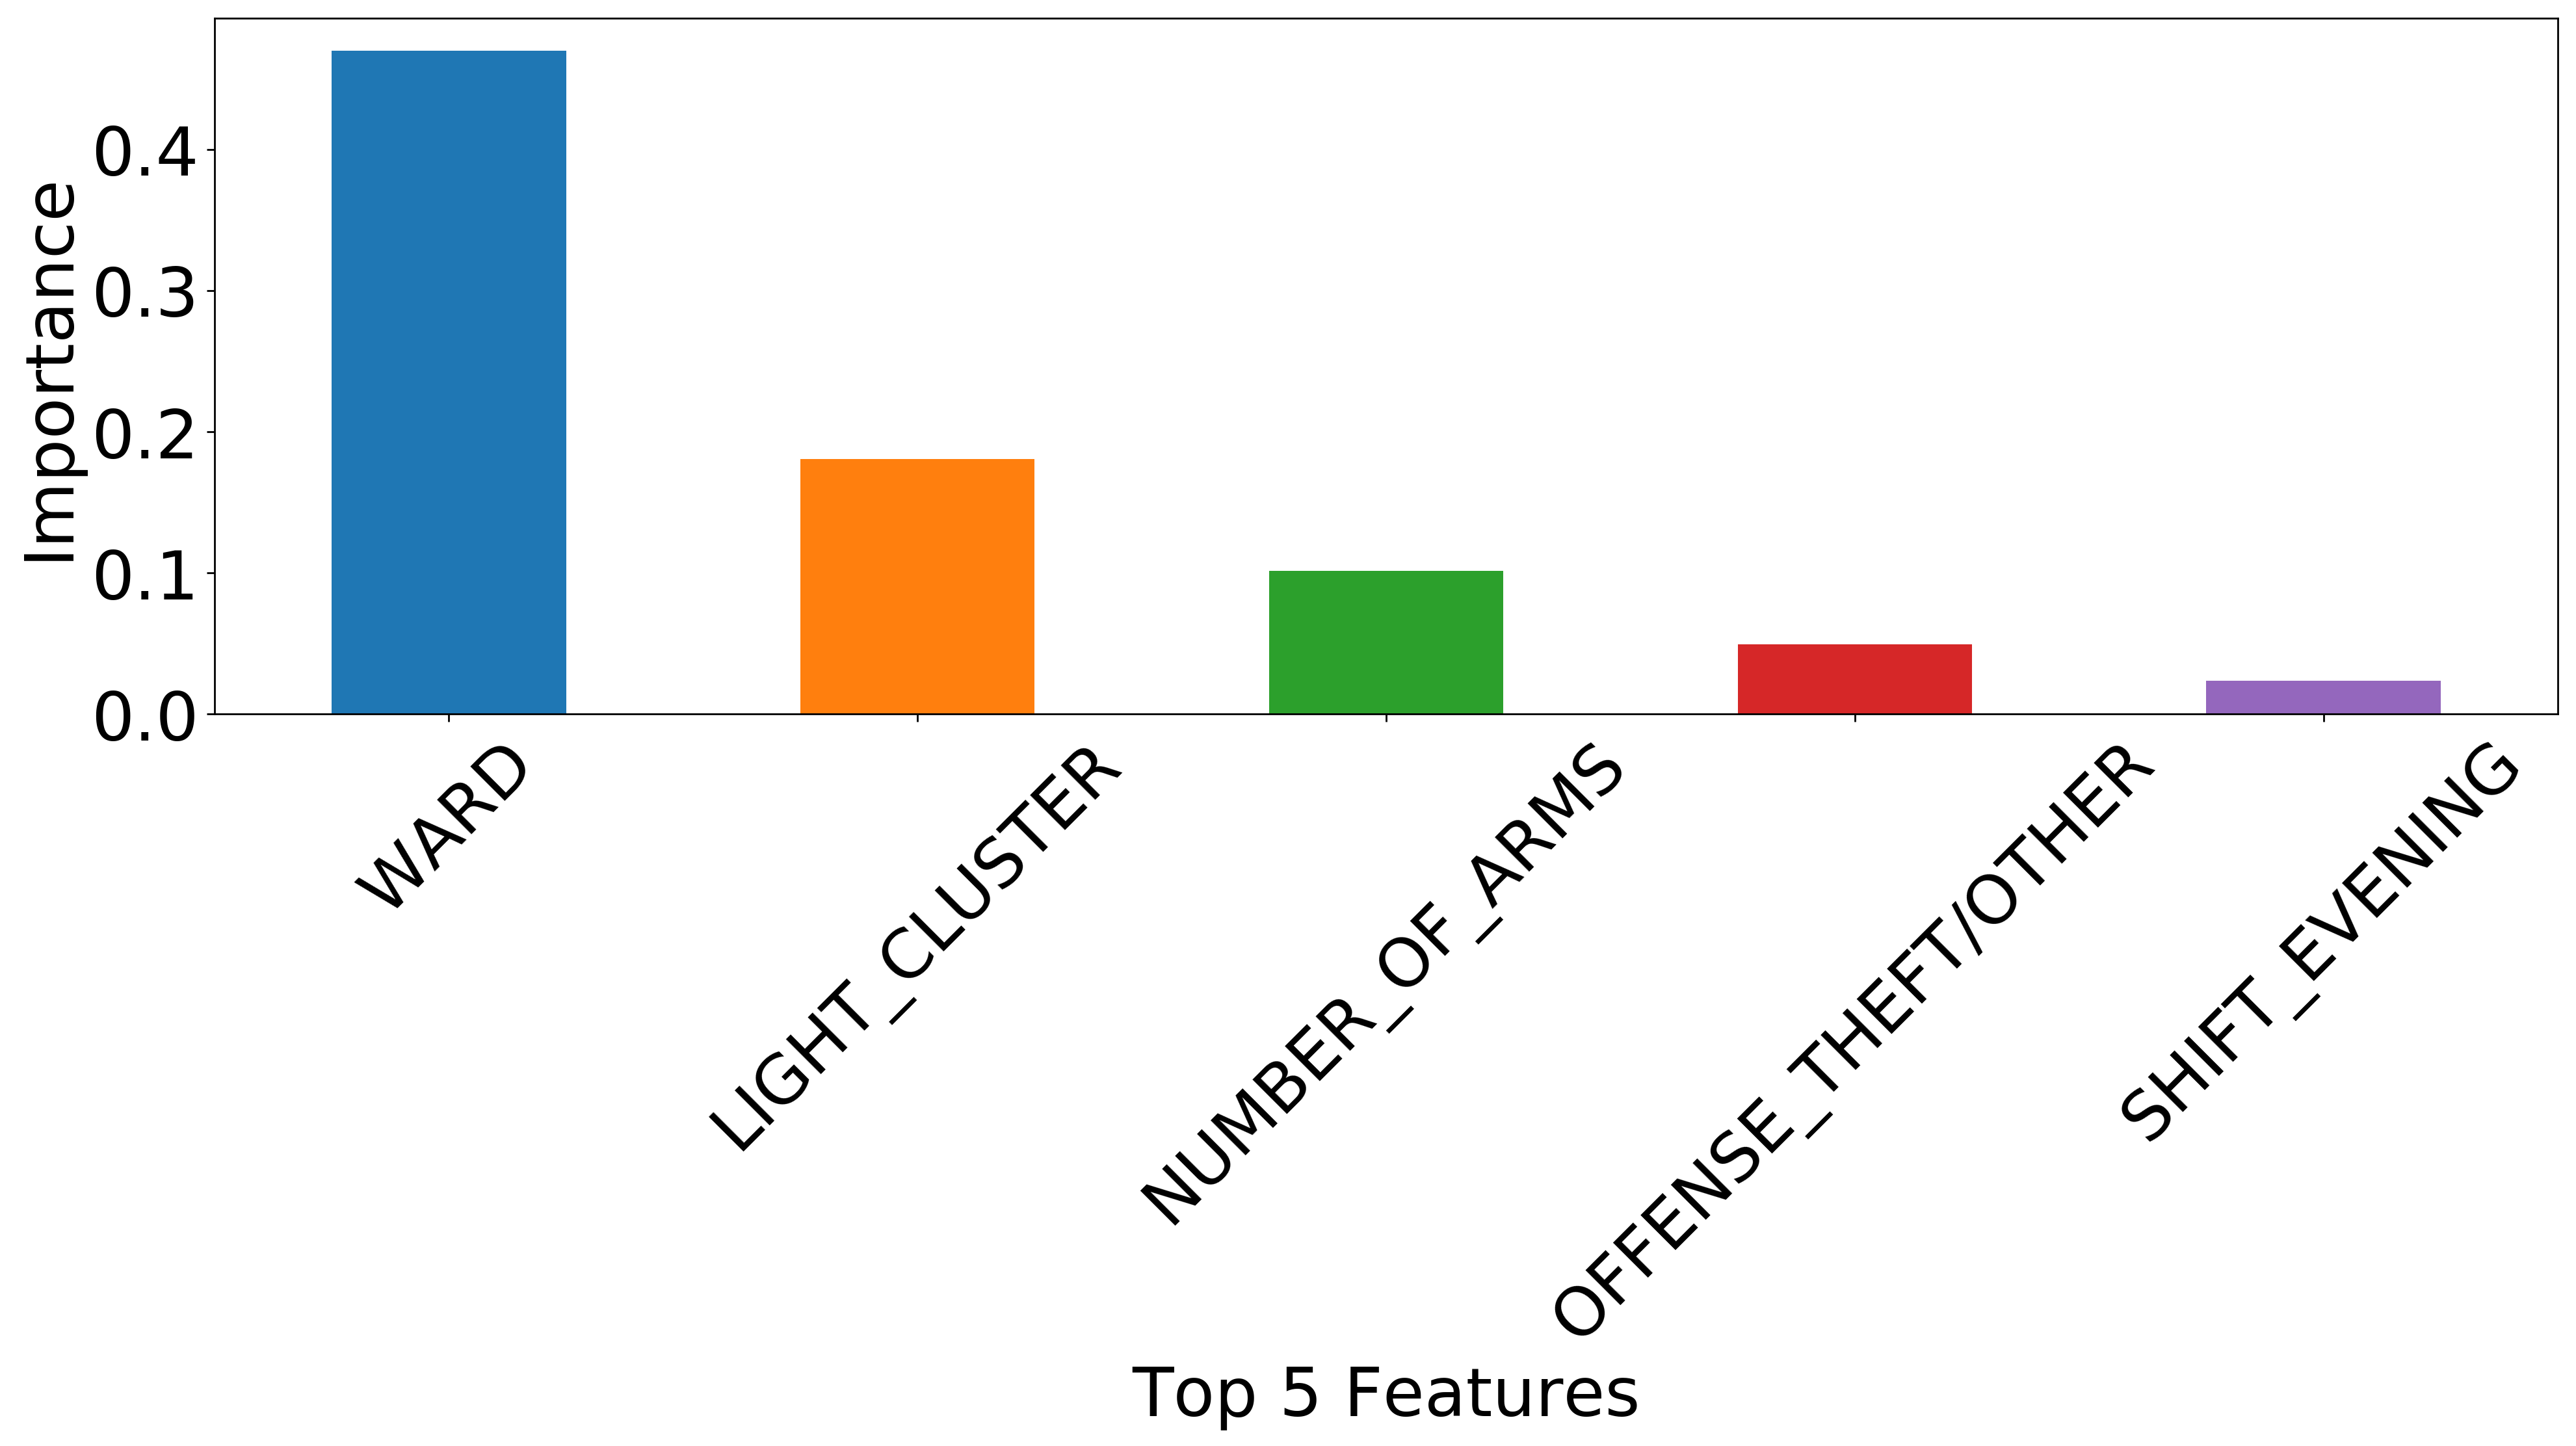

In [146]:
import matplotlib.pyplot as plt

# Make the bar Plot from f_importances 
plt.figure(figsize=(16,9),dpi=250)
f_importances[0:5].plot(kind='bar', fontsize=30, rot=45)
plt.xlabel('Top 5 Features', fontsize=30)
plt.ylabel('Importance', fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [147]:
from sklearn.metrics import precision_recall_fscore_support

# Test the model
y_pred = rfc.predict(X_test)
    
# Get precision, recall, fscore, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    
print('------------------------')
print()
print('Precision, Recall, Fscore, Support: ')
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print()

------------------------

Precision, Recall, Fscore, Support: 
(0.9304284924045785, 0.9304284924045785, 0.9304284924045785, None)

